In [1]:
import pandas as pd
import numpy as np
from sklearn import svm

import matplotlib.pyplot as plt
import seaborn as sns 

sns.set(font_scale=1.2)

%matplotlib inline

import pickle

In [2]:
recipes = pd.read_csv('dados.csv')
recipes.sample(5)

,Type,Idade,Tempo_Trabalho,Escolaridade,N_Familia,Horas_Trabalhadas_Semana,Qtde_1,Qtde_2,Qtde_3
4,NC,50,25,12,6,5,2,1,0
0,NC,55,28,3,7,5,2,0,0
15,C,42,18,25,9,5,1,0,0
11,C,42,21,16,10,8,3,0,0
1,NC,47,24,12,6,9,1,0,0


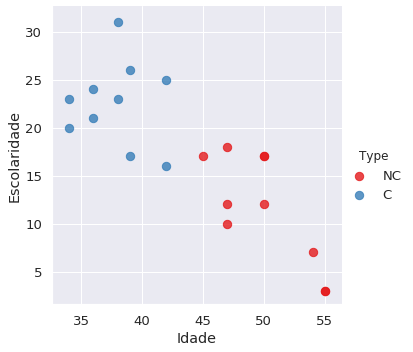

In [3]:
sns.lmplot('Idade', 'Escolaridade', data=recipes, hue='Type',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

In [4]:
ingredients = recipes[['Idade','Escolaridade']].values
type_label = np.where(recipes['Type']=='C', 0, 1)
# ingredients

In [5]:
recipe_features = recipes.columns.values[1:].tolist()
recipe_features

['Idade',
 'Tempo_Trabalho',
 'Escolaridade',
 'N_Familia',
 'Horas_Trabalhadas_Semana',
 'Qtde_1',
 'Qtde_2',
 'Qtde_3']

In [6]:
model = svm.SVC(kernel='linear')
model.fit(ingredients, type_label)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [7]:
w = model.coef_[0]
a = -w[0] / w[1]
w

array([ 6.66537262e-01, -4.85266891e-05])

In [8]:
xx = np.linspace(30, 60)
a

13735.47783341779

In [9]:
yy = a * xx - (model.intercept_[0]) / w[1]

In [10]:
# model.intercept_
model.coef_

array([[ 6.66537262e-01, -4.85266891e-05]])

In [13]:
# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])
model.support_vectors_

array([[42., 16.],
       [42., 25.],
       [45., 17.]])

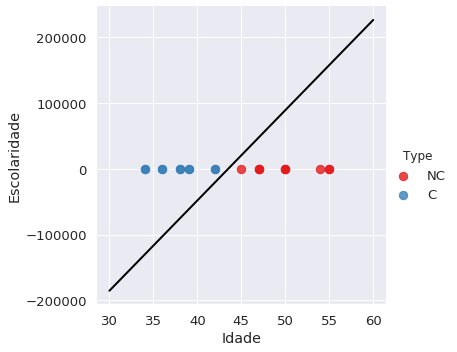

In [12]:


# Plot the hyperplane
sns.lmplot('Idade', 'Escolaridade', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black');

